In [84]:
# Code made by Jalyn Krause from Lauren Laufmans's Mathmatica file 'AstroModels.nb'
# Edited by Jalyn Krause on 30 July 2019 - 20 May 2020 (code updated on this day)

# USES ARBITRARY LOCATION MODEL

In [85]:
%matplotlib notebook
import sys
import sympy as sym
import scipy
from sympy import Symbol, exp, Eq, ImageSet, S
from sympy import solveset
from sympy import nonlinsolve
from scipy import stats
import matplotlib as plt
import matplotlib.pyplot
import numpy as np

plt.rcParams.update({'figure.max_open_warning': 0})

In [86]:
# Defines symbols used in script
tau_v = sym.Symbol('tau_v', real=True)
tau_i = sym.Symbol('tau_i', real=True)
tau_j = sym.Symbol('tau_j', real=True)
tau_h = sym.Symbol('tau_h', real=True)
tau_u = sym.Symbol('tau_u', real=True)
f_v = sym.Symbol('f_v', real=True)
f_i = sym.Symbol('f_i', real=True)
f_j = sym.Symbol('f_j', real=True)
wid = sym.Symbol('wid', real=True)

In [87]:
# Sets up equns for plotting

# Values for total extinctions are taken from Savage & Mathis (1979) paper cited in Lauren's Senior Thesis
av = 3.10 # V band
ai = 1.87 # I band
aj = 0.87 # J band
ah = 0.614 # H band
au = 5.14 # U band 

# In terms of tau_v, prints tau values at bottom    
tau_i = solveset(Eq((ai / av) * tau_v, tau_i), tau_i) # tau_i = (ai / av) * tau_v
tau_j = solveset(Eq((aj / av) * tau_v, tau_j), tau_j) # tau_j = (aj / av) * tau_v
tau_h = solveset(Eq((ah / av) * tau_v, tau_h), tau_h) # tau_h = (ah / av) * tau_v
tau_u = solveset(Eq((au / av) * tau_v, tau_u), tau_u) # tau_u = (au / av) * tau_v

print(tau_i, tau_j, tau_h, tau_u)

{0.603225806451613*tau_v} {0.280645161290323*tau_v} {0.198064516129032*tau_v} {1.65806451612903*tau_v}


<IPython.core.display.Javascript object>

V =  0.3221 I =  0.5603 J =  0.7325


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in log


<IPython.core.display.Javascript object>

V =  0.3345 I =  0.6047 J =  0.7639


<IPython.core.display.Javascript object>

V =  0.2844 I =  0.4897 J =  0.7007


<IPython.core.display.Javascript object>

V =  0.3298 I =  0.5459 J =  0.7358


<IPython.core.display.Javascript object>

V =  0.3554 I =  0.6287 J =  0.7444


<IPython.core.display.Javascript object>

V =  0.2876 I =  0.527 J =  0.6948


<IPython.core.display.Javascript object>

V =  0.3708 I =  0.5826 J =  0.7413


<IPython.core.display.Javascript object>


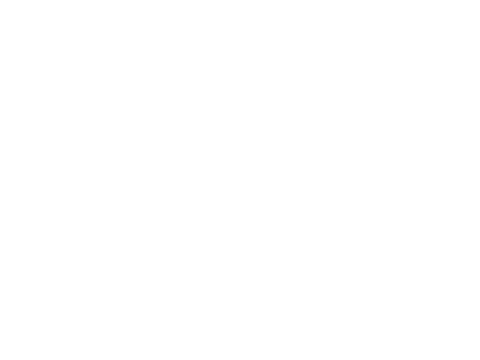

V =  0.2942 I =  0.552 J =  0.7496


<IPython.core.display.Javascript object>

V =  0.3089 I =  0.5572 J =  0.7607


<IPython.core.display.Javascript object>

V =  0.3433 I =  0.6138 J =  0.7985


In [88]:
# Sections 1A-J of Lauren's Original Code
# Diagram of sections shown in Fig. 3 of Lauren's Senior Thesis

# Values taken from DS9 data
v_1 = [0.3221, 0.3345, 0.2844, 0.3298, 0.3554, 0.2876, 0.3708, 0.2942, 0.3089, 0.3433]
i_1 = [0.5603, 0.6047, 0.4897, 0.5459, 0.6287, 0.5270, 0.5826, 0.5520, 0.5572, 0.6138]
j_1 = [0.7325, 0.7639, 0.7007, 0.7358, 0.7444, 0.6948, 0.7413, 0.7496, 0.7607, 0.7985]

# Developed from equn (5) of Lauren's senior thesis
# V = f + (1-f)*e^(-tau_V)
# ==> tau_v = log( (V -f) / 1-f)
# f = fractional distance into the cloud where the dust is located
# Left side of equation is a ratio of the total light the observer sees in each band, in a fractional form compared to the total light emitted
# *Recall all tau values are in terms of tau_v*

def tau(f,V):
    xxx = (V-f) / (1-f)
    yyy = -1*np.log( xxx )
    yyy[xxx <= 0] = 5
    return yyy

f_input = np.linspace(0,1,101)
 
for i in range(0, len(v_1)):
    fig = plt.pyplot.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(f_input, tau(f_input, v_1[i])/3.1*3.1, label="V")
    ax.plot(f_input, tau(f_input, i_1[i])/1.87*3.1, label="I")
    ax.plot(f_input, tau(f_input, j_1[i])/0.87*3.1, label="J")
    ax.set_ylim((0.,3))
    ax.set_xlim((0,1))
    ax.set_title(r'$\tau_v$ vs. Fractional Location in Galaxy (f)')
    ax.set_xlabel('f')
    ax.set_ylabel(r'$\tau_v$')
    ax.legend(loc = 'best')
    print('V = ', v_1[i], 'I = ', i_1[i], 'J = ', j_1[i])

    # ADD ON TO FIND INTERSECTION POINT
    # (use link to reference later) https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html
    #X, Y = np.mgrid[0:1:100j, 0:3:100j]
    #positions = np.vstack([f_input.ravel(), (tau(f_input, 0.5603)/1.87*3.1).ravel()])
    #print(positions)
    #values = np.vstack([np.ones_like(f_input).ravel()])
    #kernel = stats.gaussian_kde(values)
    #Z = np.reshape(kernel(positions).T, X.shape)  
    
fig.show()

In [89]:
# Sections 2A-I of Lauren's Original Code
# Diagram of sections shown in Fig. 3 of Lauren's Senior Thesis
# Values taken from DS9 data

v_2 = [0.3795, 0.3865, 0.3919, 0.3651, 0.3203, 0.3374, 0.2898, 0.3258, 0.3467]
i_2 = [0.7132, 0.7223, 0.6805, 0.6953, 0.6464, 0.6425, 0.6391, 0.6732, 0.6761]
j_2 = [0.8054, 0.8373, 0.8188, 0.8195, 0.7896, 0.8144, 0.8191, 0.8092, 0.7924]

# Developed from equn (5) of Lauren's senior thesis
# V = f + (1-f)*e^(-tau_V)
# ==> tau_v = log( (V -f) / 1-f)
# f = fractional distance into the cloud where the dust is located
# Left side of equation is a ratio of the total light the observer sees in each band, in a fractional form compared to the total light emitted
# *Recall all tau values are in terms of tau_v*

def tau(f,V):
    xxx = (V-f) / (1-f)
    yyy = -1*np.log( xxx )
    yyy[xxx <= 0] = 5
    return yyy

f_input = np.linspace(0,1,101)
 

for j in range(0, len(v_2)):
    fig = plt.pyplot.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(f_input, tau(f_input, v_2[j])/3.1*3.1, label="V")
    ax.plot(f_input, tau(f_input, i_2[j])/1.87*3.1, label="I")
    ax.plot(f_input, tau(f_input, j_2[j])/0.87*3.1, label="J")
    ax.set_ylim((0.,3))
    ax.set_xlim((0,1))
    ax.set_title(r'$\tau_v$ vs. Fractional Location in Galaxy (f)')
    ax.set_xlabel('f')
    ax.set_ylabel(r'$\tau_v$')
    ax.legend(loc = 'best')
    print('V = ', v_2[j], 'I = ', i_2[j], 'J = ', j_2[j])

fig.show()

<IPython.core.display.Javascript object>

V =  0.3795 I =  0.7132 J =  0.8054


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in log


<IPython.core.display.Javascript object>

V =  0.3865 I =  0.7223 J =  0.8373


<IPython.core.display.Javascript object>

V =  0.3919 I =  0.6805 J =  0.8188


<IPython.core.display.Javascript object>

V =  0.3651 I =  0.6953 J =  0.8195


<IPython.core.display.Javascript object>

V =  0.3203 I =  0.6464 J =  0.7896


<IPython.core.display.Javascript object>

V =  0.3374 I =  0.6425 J =  0.8144


<IPython.core.display.Javascript object>

V =  0.2898 I =  0.6391 J =  0.8191


<IPython.core.display.Javascript object>

V =  0.3258 I =  0.6732 J =  0.8092


<IPython.core.display.Javascript object>

V =  0.3467 I =  0.6761 J =  0.7924


In [90]:
# Sections 3A-J of Lauren's Original Code
# Diagram of sections shown in Fig. 3 of Lauren's Senior Thesis
# Values taken from DS9 data

v_3 = [0.2894, 0.3244, 0.3487, 0.4144, 0.4668, 0.3226, 0.2603, 0.2895, 0.2550, 0.3434]
i_3 = [0.4487, 0.5853, 0.6992, 0.8281, 0.8048, 0.4899, 0.4919, 0.5872, 0.4678, 0.5532]
j_3 = [0.6487, 0.7449, 0.8759, 0.9313, 0.8894, 0.6729, 0.6906, 0.7305, 0.7501, 0.7528]

# Developed from equn (5) of Lauren's senior thesis
# V = f + (1-f)*e^(-tau_V)
# ==> tau_v = log( (V -f) / 1-f)
# f = fractional distance into the cloud where the dust is located
# Left side of equation is a ratio of the total light the observer sees in each band, in a fractional form compared to the total light emitted
# *Recall all tau values are in terms of tau_v*

def tau(f,V):
    xxx = (V-f) / (1-f)
    yyy = -1*np.log( xxx )
    yyy[xxx <= 0] = 5
    return yyy

f_input = np.linspace(0,1,101)
 
for k in range(0, len(v_3)):
    fig = plt.pyplot.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(f_input, tau(f_input, v_3[k])/3.1*3.1, label="V")
    ax.plot(f_input, tau(f_input, i_3[k])/1.87*3.1, label="I")
    ax.plot(f_input, tau(f_input, j_3[k])/0.87*3.1, label="J")
    ax.set_ylim((0.,3))
    ax.set_xlim((0,1))
    ax.set_title(r'$\tau_v$ vs. Fractional Location in Galaxy (f)')
    ax.set_xlabel('f')
    ax.set_ylabel(r'$\tau_v$')
    ax.legend(loc = 'best')
    print('V = ', v_3[k], 'I = ', i_3[k], 'J = ', j_3[k])

fig.show()

<IPython.core.display.Javascript object>

V =  0.2894 I =  0.4487 J =  0.6487


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in log


<IPython.core.display.Javascript object>

V =  0.3244 I =  0.5853 J =  0.7449


<IPython.core.display.Javascript object>

V =  0.3487 I =  0.6992 J =  0.8759


<IPython.core.display.Javascript object>

V =  0.4144 I =  0.8281 J =  0.9313


<IPython.core.display.Javascript object>

V =  0.4668 I =  0.8048 J =  0.8894


<IPython.core.display.Javascript object>

V =  0.3226 I =  0.4899 J =  0.6729


<IPython.core.display.Javascript object>

V =  0.2603 I =  0.4919 J =  0.6906


<IPython.core.display.Javascript object>

V =  0.2895 I =  0.5872 J =  0.7305


<IPython.core.display.Javascript object>

V =  0.255 I =  0.4678 J =  0.7501


<IPython.core.display.Javascript object>

V =  0.3434 I =  0.5532 J =  0.7528


In [91]:
# AREA OF SECTIONS SHOWN IN FIG. 3 OF LAUREN'S SENIOR THESIS

# Arcseconds per pixel
arcpix = 0.03962000086903572

# Area in square pixels of the regions; {1C, 1D, 3A, 3F, 3G, 3J} 
areasqpx = [28, 32, 28, 19, 17, 18]

lcm = []

# Width in arcseconds of regions
for i in range(0, len(areasqpx)):
    widtharc = arcpix * np.sqrt(areasqpx[i])

    # Arcseconds to Radians conversion: 1 rad = 180/(pi*3600 arcsec) = 206,265 arcseconds
    conv = (180*3600) / np.pi
    widthrad = widtharc / conv

    # From NED, D = 56 Mpc
    # Theta * D = ~L
    dist = 56*10**6  # [Mpc]
    
    lpc = widthrad * dist
    print('lpc = ', lpc)
    
    lcm = np.append(lcm, (3.085677*10**18) * lpc)

print('lcm = ', lcm)


lpc =  56.918885819145885
lpc =  60.84884844918564
lpc =  56.918885819145885
lpc =  46.887186680587135
lpc =  44.35083852049169
lpc =  45.63663633688922
lcm =  [1.75633297e+20 1.87759892e+20 1.75633297e+20 1.44678714e+20
 1.36852362e+20 1.40819919e+20]


In [92]:
# FINDING EXTINCTION CURVE INFO
# Values used come from Draine 2001 paper cited in Lauren's senior thesis
# Values from method taken directly from Lauren's code, not needed to be recalculated
'''
Band	wavelength	Sigma(extinction)
U	0.365	7.62*10^-22
B	0.440	6.20*10^-22
V	0.550	4.66*10^-22
R	0.700	3.31*10^-22
I	0.900	2.27*10^-22
J	1.22	1.41*10^-22
H	1.63	8.99*10^-23
K	2.20	5.45*10^-23
L	3.45	2.37*10^-23
 	3.60	2.18*10^-23
'''    

data_1 = [[0.365, 7.62], [0.440, 6.20], [0.550, 4.66], [.700, 3.31], [0.9, 2.27], [1.22, 1.41], [1.63, 0.899]]

data_2 = [[0.7, 3.31], [0.9, 2.27], [1.22, 1.41], [1.63, 0.899], [2.20, 0.545], [3.45, 0.237], [3.60, 0.218]]

data_3 = [[0.274, 6.2], [0.344, 4.9], [0.4, 4.4], [0.44, 4.10], [0.55, 3.10], [0.70, 2.32]]

sigma_v = 4.60582*10**-22
sigma_i = 2.64231*10**-22
sigma_j = 1.35557*10**-22

In [93]:
# CALCULATING n

# From equn. (9), (10), and (11) of Lauren's senior thesis
# L is the path length (effectively the diameter of the sphere of the dust feature)

# Taus & fs for regions:{1C, 1D, 3A, 3F, 3G, 3J} (choose them from the graphs)
# Taus = {1.351, 1.138, 1.935, 1.818, 1.312, 1.04};
# Similarly, f = {0.0456, 0.02616, 0.1785, 0.2044, 0.009954, 0.01319}

tau_reg = [1.351, 1.138, 1.935, 1.818, 1.312, 1.04]
f_reg = [0.0456,0.02616,0.1785,0.2044,0.009954,0.01319]

n = []

for i in range(0, len(tau_reg)):
    n = np.append(n, tau_reg[i] / (sigma_v * lcm[i]))
    
print('N = ', n)


N =  [16.70096378 13.15929048 23.92032932 27.2823816  20.81491181 16.03475348]


In [94]:
# MASS OF BOXES

mass = 1.67*10**-24
mass_correct = mass/0.7381
vol = lcm**3
print('Vol = ', vol)

# Mass of each box in grams
# n solved for in cell above
massgrams = n*vol*mass_correct

# Mass of each box in solar masses
sun = 1.988*10**33 # Mass of sun
solarmass = massgrams/sun


Vol =  [5.41776996e+60 6.61924538e+60 5.41776996e+60 3.02840473e+60
 2.56304892e+60 2.79249415e+60]


In [95]:
# MASS OF WHOLE JET

# Volume of whole jet
npix = 762
width = ((arcpix * np.sqrt(npix)) / conv) * dist * (3.085677*10**18)   # [cm]
vol = width**3   # [cm^3]
print('VOLUME = ', vol, 'cm^3')

# Avg. density in sections 3A, 3F, 3G
avgden = (n[2] + n[3] + n[4]) / 3
print('AVG. DENS. = ', avgden)

massgrams = (avgden * vol * mass_correct) / sun
print('MASS IN GRAMS = ', massgrams)

VOLUME =  7.691587249488019e+62 cm^3
AVG. DENS. =  24.005874242956363
MASS IN GRAMS =  21014467.19339837


In [96]:
############# START OF ORIGINAL CODE WRITTEN BY JALYN KRAUSE ##############
############     EDITED DATE: 02/04/2020 - 02/06/2020        #############

# THE FOLLOWING CODE PLOTS TRANSMISSION (eqn. 5 in Lauren's Thesis) VS. BAND (V, I, J)

In [97]:
# PLOTS FOR 1ST CHUNK OF DATA

# ARRAYS HOLD TRANSMISSION VALUES DERIVED FROM LAUREN'S PLOTS ABOVE

i1_v = [0.3221, 0.3345, 0.2844, 0.3298, 0.3554, 0.2876, 0.3708, 0.2942, 0.3089, 0.3433]
i1_i = [0.5603, 0.6047, 0.4897, 0.5459, 0.6287, 0.5270, 0.5826, 0.5520, 0.5572, 0.6138]
i1_j = [0.7325, 0.7639, 0.7007, 0.7358, 0.7444, 0.6948, 0.7413, 0.7496, 0.7607, 0.7985]

# EACH WAVELENGTH BAND (V = 555nm, I = 814nm, J = 1250nm)

v = [0.555,0.555,0.555,0.555,0.555,0.555,0.555,0.555,0.555,0.555]
i = [0.814,0.814,0.814,0.814,0.814,0.814,0.814,0.814,0.814,0.814]
j = [1.250,1.250,1.250,1.250,1.250,1.250,1.250,1.250,1.250,1.250]


# PLOTS FOR 1ST CHUNK OF DATA

fig = plt.pyplot.figure(figsize = (11,8))

# Plots Lauren's data calculated from plots above
#matplotlib.pyplot.scatter(v, i1_v, edgecolor='black', label="V = [0.3221, 0.3345, 0.2844, 0.3298, 0.3554, 0.2876, 0.3708, 0.2942, 0.3089, 0.3433]")
#matplotlib.pyplot.scatter(i, i1_i, s=9.3, edgecolor='black', zorder=10,label="I = [0.5603, 0.6047, 0.4897, 0.5459, 0.6287, 0.5270, 0.5826, 0.5520, 0.5572, 0.6138]")
#matplotlib.pyplot.scatter(j, i1_j, edgecolor='black', label="J = [0.7325, 0.7639, 0.7007, 0.7358, 0.7444, 0.6948, 0.7413, 0.7496, 0.7607, 0.7985]")

# Normalized v = 0.3, Connects lines to see crossovers in transmission
matplotlib.pyplot.plot([v, i, j], [[0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3], i1_i, i1_j], marker='o',  linestyle='dashed')

matplotlib.pyplot.title('Transmitted Light vs. Wavelength (Region 1)')
matplotlib.pyplot.xlabel('Wavelength (Microns) (V, I, J bands)')
matplotlib.pyplot.ylabel('Trans.')
matplotlib.pyplot.ylim((0.,1.))
#matplotlib.pyplot.legend(loc = 4)

print('V = ', i1_v, 'NORMALIZED TO 0.3')
print('I = ', i1_i)
print('J = ', i1_j)

#for i in range(0, len(i1_v)):
#matplotlib.pyplot.annotate(i1_v[i], (v[i], i1_v[i]))

fig.show()

<IPython.core.display.Javascript object>

V =  [0.3221, 0.3345, 0.2844, 0.3298, 0.3554, 0.2876, 0.3708, 0.2942, 0.3089, 0.3433] NORMALIZED TO 0.3
I =  [0.5603, 0.6047, 0.4897, 0.5459, 0.6287, 0.527, 0.5826, 0.552, 0.5572, 0.6138]
J =  [0.7325, 0.7639, 0.7007, 0.7358, 0.7444, 0.6948, 0.7413, 0.7496, 0.7607, 0.7985]


In [98]:
# PLOTS FOR 2ND CHUNK OF DATA

# ARRAYS HOLD TRANSMISSION VALUES DERIVED FROM LAUREN'S PLOTS ABOVE

i2_v = [0.3795, 0.3865, 0.3919, 0.3651, 0.3203, 0.3374, 0.2898, 0.3258, 0.3467]
i2_i = [0.7132, 0.7223, 0.6805, 0.6953, 0.6464, 0.6425, 0.6391, 0.6732, 0.6761]
i2_j = [0.8054, 0.8373, 0.8188, 0.8195, 0.7896, 0.8144, 0.8191, 0.8092, 0.7924]

# EACH WAVELENGTH BAND (V = 555nm, I = 814nm, J = 1250nm)

v = [0.555,0.555,0.555,0.555,0.555,0.555,0.555,0.555,0.555]
i = [0.814,0.814,0.814,0.814,0.814,0.814,0.814,0.814,0.814]
j = [1.250,1.250,1.250,1.250,1.250,1.250,1.250,1.250,1.250]

# PLOTS FIG

fig = plt.pyplot.figure(figsize = (11,8))

# Plots data from Lauren's plots above
#matplotlib.pyplot.scatter(v, i2_v, edgecolor='black', label="V = [0.3795, 0.3865, 0.3919, 0.3651, 0.3203, 0.3374, 0.2898, 0.3258, 0.3467]")
#matplotlib.pyplot.scatter(i, i2_i, edgecolor='black', label="I = [0.7132, 0.7223, 0.6805, 0.6953, 0.6464, 0.6425, 0.6391, 0.6732, 0.6761]")
#matplotlib.pyplot.scatter(j, i2_j, edgecolor='black', label="J = [0.8054, 0.8373, 0.8188, 0.8195, 0.7896, 0.8144, 0.8191, 0.8092, 0.7924]")

#matplotlib.pyplot.legend(loc = 4)

# Normalized v = 0.3, Connects lines to see crossovers in transmission
matplotlib.pyplot.plot([v, i, j], [[0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3], i2_i, i2_j], marker='o',  linestyle='dashed')

matplotlib.pyplot.title('Transmitted Light vs. Wavelength (Region 2)')
matplotlib.pyplot.xlabel('Wavelength (Microns) (V, I, J bands)')
matplotlib.pyplot.ylabel('Trans.')
matplotlib.pyplot.ylim((0.,1.))
fig.show() 

print('V = ', i2_v, 'NORMALIZED TO 0.3')
print('I = ', i2_i)
print('J = ', i2_j)

<IPython.core.display.Javascript object>

V =  [0.3795, 0.3865, 0.3919, 0.3651, 0.3203, 0.3374, 0.2898, 0.3258, 0.3467] NORMALIZED TO 0.3
I =  [0.7132, 0.7223, 0.6805, 0.6953, 0.6464, 0.6425, 0.6391, 0.6732, 0.6761]
J =  [0.8054, 0.8373, 0.8188, 0.8195, 0.7896, 0.8144, 0.8191, 0.8092, 0.7924]


In [99]:
# PLOTS FOR 3ND CHUNK OF DATA

i3_v = [0.2894, 0.3244, 0.3487, 0.4144, 0.4668, 0.3226, 0.2603, 0.2895, 0.2550, 0.3434]
i3_i = [0.4487, 0.5853, 0.6992, 0.8281, 0.8084, 0.4899, 0.4919, 0.5872, 0.4678, 0.5532]
i3_j = [0.6487, 0.7449, 0.8759, 0.9313, 0.8894, 0.6729, 0.6906, 0.7305, 0.7501, 0.7528]

# EACH WAVELENGTH BAND (V = 555nm, I = 814nm, J = 1250nm)

v = [0.555,0.555,0.555,0.555,0.555,0.555,0.555,0.555,0.555,0.555]
i = [0.814,0.814,0.814,0.814,0.814,0.814,0.814,0.814,0.814,0.814]
j = [1.250,1.250,1.250,1.250,1.250,1.250,1.250,1.250,1.250,1.250]

# PLOTTING FIG

fig = plt.pyplot.figure(figsize = (11,8))

# Plots numbers from lauren's plots above
#matplotlib.pyplot.scatter(v, i3_v, edgecolor='black', label="V = [0.2894, 0.3244, 0.3487, 0.4144, 0.4668, 0.3226, 0.2603, 0.2895, 0.2550, 0.3434]")
#matplotlib.pyplot.scatter(i, i3_i, edgecolor='black', label="I = [0.4487, 0.5853, 0.6992, 0.8281, 0.8084, 0.4899, 0.4919, 0.5872, 0.4678, 0.5532]")
#matplotlib.pyplot.scatter(j, i3_j, edgecolor='black', label="J = [0.6487, 0.7449, 0.8759, 0.9313, 0.8894, 0.6729, 0.6906, 0.7305, 0.7501, 0.7528]")
#matplotlib.pyplot.legend(loc = 4)


# Normalized v = 0.3, Connects lines to see crossovers in transmission
matplotlib.pyplot.plot([v, i, j], [[0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3], i3_i, i3_j], marker='o',  linestyle='dashed')

matplotlib.pyplot.title('Transmitted Light vs. Wavelength (Region 3)')
matplotlib.pyplot.xlabel('Wavelength (Microns) (V, I, J bands)')
matplotlib.pyplot.ylabel('Trans.')
matplotlib.pyplot.ylim((0.,1.))
fig.show()

print('V = ', i3_v, 'NORMALIZED 0.3')
print('I = ', i3_i)
print('J = ', i3_j)

<IPython.core.display.Javascript object>

V =  [0.2894, 0.3244, 0.3487, 0.4144, 0.4668, 0.3226, 0.2603, 0.2895, 0.255, 0.3434] NORMALIZED 0.3
I =  [0.4487, 0.5853, 0.6992, 0.8281, 0.8084, 0.4899, 0.4919, 0.5872, 0.4678, 0.5532]
J =  [0.6487, 0.7449, 0.8759, 0.9313, 0.8894, 0.6729, 0.6906, 0.7305, 0.7501, 0.7528]


<IPython.core.display.Javascript object>


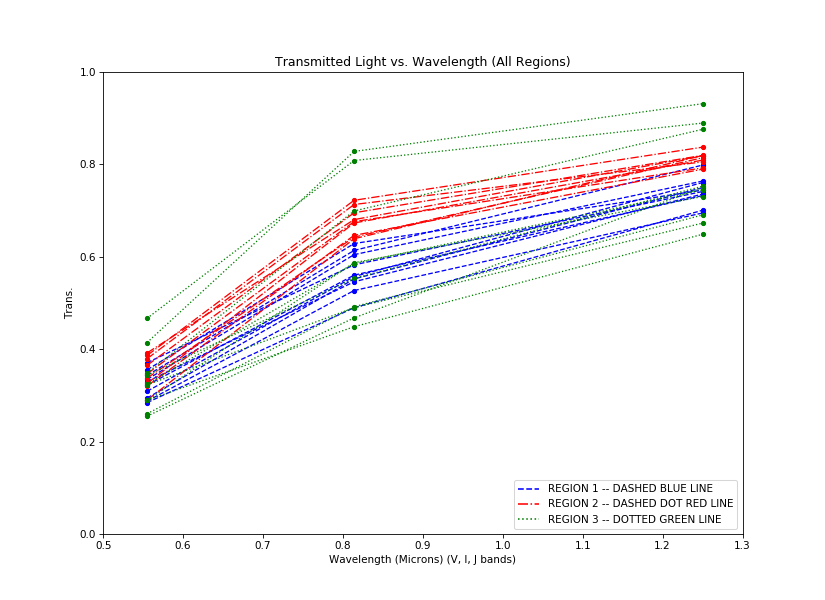

V_one =  [0.3221, 0.3345, 0.2844, 0.3298, 0.3554, 0.2876, 0.3708, 0.2942, 0.3089, 0.3433]
I_one =  [0.5603, 0.6047, 0.4897, 0.5459, 0.6287, 0.527, 0.5826, 0.552, 0.5572, 0.6138]
J_one =  [0.7325, 0.7639, 0.7007, 0.7358, 0.7444, 0.6948, 0.7413, 0.7496, 0.7607, 0.7985]
V_two =  [0.3795, 0.3865, 0.3919, 0.3651, 0.3203, 0.3374, 0.2898, 0.3258, 0.3467]
I_two =  [0.7132, 0.7223, 0.6805, 0.6953, 0.6464, 0.6425, 0.6391, 0.6732, 0.6761]
J_two =  [0.8054, 0.8373, 0.8188, 0.8195, 0.7896, 0.8144, 0.8191, 0.8092, 0.7924]
V_three =  [0.2894, 0.3244, 0.3487, 0.4144, 0.4668, 0.3226, 0.2603, 0.2895, 0.255, 0.3434]
I_three =  [0.4487, 0.5853, 0.6992, 0.8281, 0.8084, 0.4899, 0.4919, 0.5872, 0.4678, 0.5532]
J_three =  [0.6487, 0.7449, 0.8759, 0.9313, 0.8894, 0.6729, 0.6906, 0.7305, 0.7501, 0.7528]


In [156]:
# PLOTS ALL DATA FROM THE TRANSMISSION DATA FOR EACH REGION ON THE SAME DIAGRAM

fig = plt.pyplot.figure(figsize = (11,8))

# XDATA 
v_ten = [0.555,0.555,0.555,0.555,0.555,0.555,0.555,0.555,0.555,0.555]  # ten elements in array
v_nine = [0.555,0.555,0.555,0.555,0.555,0.555,0.555,0.555,0.555]  # nine elements in array
i_ten = [0.814,0.814,0.814,0.814,0.814,0.814,0.814,0.814,0.814,0.814]
i_nine = [0.814,0.814,0.814,0.814,0.814,0.814,0.814,0.814,0.814]
j_ten = [1.250,1.250,1.250,1.250,1.250,1.250,1.250,1.250,1.250,1.250]
j_nine = [1.250,1.250,1.250,1.250,1.250,1.250,1.250,1.250,1.250]


r_one = matplotlib.pyplot.plot((v_ten,i_ten,j_ten),(i1_v,i1_i,i1_j), marker='o',ms=4, lw=1.25, color='b',  linestyle='dashed')
r_two = matplotlib.pyplot.plot((v_nine,i_nine,j_nine),(i2_v,i2_i,i2_j), marker='o',ms=4, lw=1.25, color='r', linestyle='dashdot')
r_three = matplotlib.pyplot.plot((v_ten,i_ten,j_ten),(i3_v,i3_i,i3_j), marker='o',ms=4, lw=1.25, color='g',  linestyle='dotted')

line1, = matplotlib.pyplot.plot([1, 2, 3], label="REGION 1 -- DASHED BLUE LINE", color='b', linestyle='dashed')
line2, = matplotlib.pyplot.plot([3, 2, 1], label="REGION 2 -- DASHED DOT RED LINE", color='r', linestyle='dashdot')
line3, = matplotlib.pyplot.plot([2, 2, 2], label="REGION 3 -- DOTTED GREEN LINE", color='g', linestyle='dotted')

matplotlib.pyplot.title('Transmitted Light vs. Wavelength (All Regions)')
matplotlib.pyplot.xlabel('Wavelength (Microns) (V, I, J bands)')
matplotlib.pyplot.ylabel('Trans.')
matplotlib.pyplot.xlim((0.5,1.3))
matplotlib.pyplot.ylim((0.,1.))
matplotlib.pyplot.legend(loc=4)
fig.show()


print('V_one = ', i1_v)
print('I_one = ', i1_i)
print('J_one = ', i1_j)

print('V_two = ', i2_v)
print('I_two = ', i2_i)
print('J_two = ', i2_j)

print('V_three = ', i3_v)
print('I_three = ', i3_i)
print('J_three = ', i3_j)

In [ ]:
# PLOTS TRANSMISSION RATIOS 

r_one = matplotlib.pyplot.plot((v_ten,i_ten,j_ten),(i1_v,i1_i,i1_j), marker='o',ms=4, lw=1.25, color='b',  linestyle='dashed')
r_two = matplotlib.pyplot.plot((v_nine,i_nine,j_nine),(i2_v,i2_i,i2_j), marker='o',ms=4, lw=1.25, color='r', linestyle='dashdot')
r_three = matplotlib.pyplot.plot((v_ten,i_ten,j_ten),(i3_v,i3_i,i3_j), marker='o',ms=4, lw=1.25, color='g',  linestyle='dotted')

line1, = matplotlib.pyplot.plot([1, 2, 3], label="REGION 1 -- DASHED BLUE LINE", color='b', linestyle='dashed')
line2, = matplotlib.pyplot.plot([3, 2, 1], label="REGION 2 -- DASHED DOT RED LINE", color='r', linestyle='dashdot')
line3, = matplotlib.pyplot.plot([2, 2, 2], label="REGION 3 -- DOTTED GREEN LINE", color='g', linestyle='dotted')

matplotlib.pyplot.title('Transmitted Light vs. Wavelength (All Regions)')
matplotlib.pyplot.xlabel('Wavelength (Microns) (V, I, J bands)')
matplotlib.pyplot.ylabel('Trans.')
matplotlib.pyplot.xlim((0.5,1.3))
matplotlib.pyplot.ylim((0.,1.))
matplotlib.pyplot.legend(loc=4)
fig.show()